In [1]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import string
import re
from textblob import TextBlob

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [2]:
def resize_image(image, width=None, height=None):
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image

    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    _, binary_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return img, binary_img

def post_process_text(text):
    # Spell checking using TextBlob
    blob = TextBlob(text)
    corrected_text = blob.correct()
    
    # Convert corrected TextBlob back to string
    corrected_text = str(corrected_text)
    
    # Add spaces after punctuation if missing
    corrected_text = re.sub(r'([.,!?;])(?=[^\s])', r'\1 ', corrected_text)
    
    # Capitalize the first letter of each sentence
    corrected_text = '. '.join([sentence.capitalize() for sentence in corrected_text.split('. ')])
    
    return corrected_text

In [3]:
def draw_boxes_on_characters(image, boxes):
    img_height, img_width = image.shape[:2]
    for box in boxes.splitlines():
        box = box.split(" ")
        character = box[0]
        x = int(box[1])
        y = int(box[2])
        x2 = int(box[3])
        y2 = int(box[4])
        cv2.rectangle(image, (x, img_height - y), (x2, img_height - y2), (0, 255, 0), 1)
        cv2.putText(image, character, (x, img_height - y2), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)
    return image

def draw_boxes_on_text(image, raw_data):
    for count, data in enumerate(raw_data.splitlines()):
        if count > 0:
            data = data.split()
            if len(data) == 12:
                x, y, w, h, content = int(data[6]), int(data[7]), int(data[8]), int(data[9]), data[11]
                cv2.rectangle(image, (x, y), (w + x, h + y), (0, 255, 0), 1)
                cv2.putText(image, content, (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1)
    return image

def show_image_with_matplotlib(image, title):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb_image)
    plt.title(title)
    plt.axis('off')
    plt.show()

Select the language of the image:
1: English
2: Bengali
3: Kannada
4: Hindi


Enter the number corresponding to the language:  1
Enter the image file name (e.g., images\image.png):  SAMPLE.png


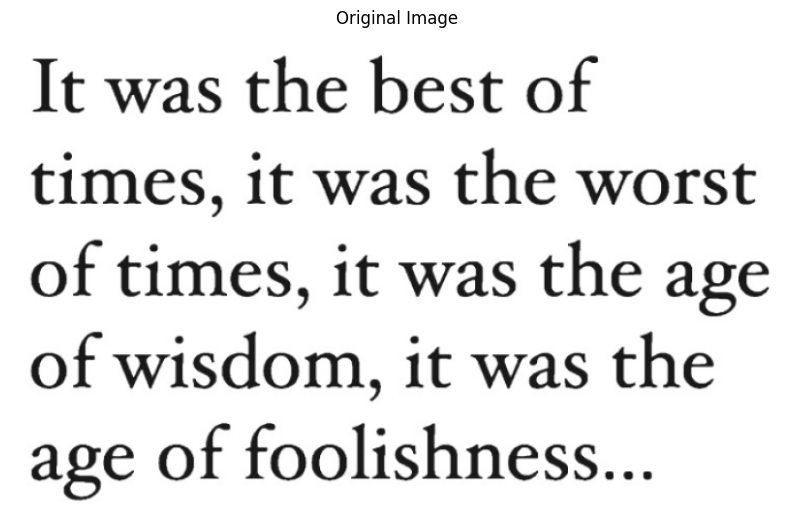

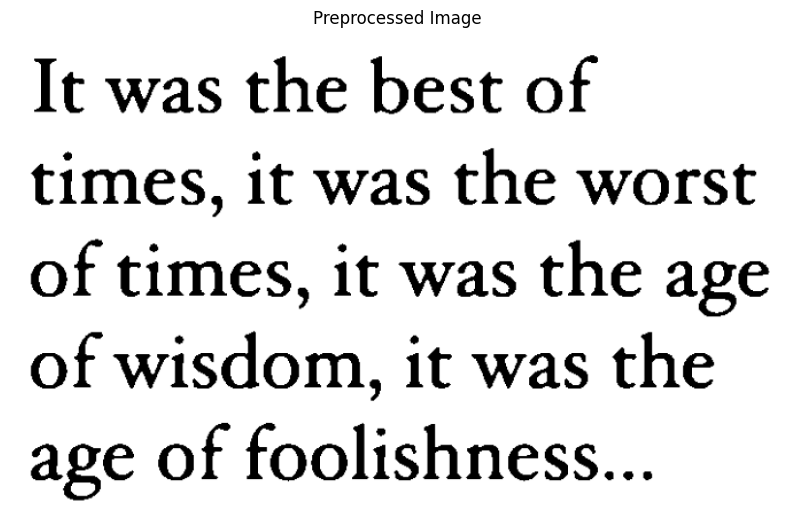

Detected Texts:
 It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...

Character Bounding Boxes:
 I 22 367 42 415 0
t 47 366 67 403 0
w 86 366 136 397 0
a 138 366 166 398 0
s 170 366 191 398 0
t 213 366 234 403 0
h 238 367 274 417 0
e 277 366 304 398 0
b 326 365 360 417 0
e 365 366 392 398 0
s 383 365 408 417 0
t 398 366 445 403 0
o 467 366 499 398 0
f 505 367 531 418 0
t 19 283 40 320 0
i 45 284 60 331 0
m 64 284 118 315 0
e 103 272 134 331 0
s 121 283 149 315 0
, 155 272 192 315 0
i 215 284 230 331 0
t 234 283 256 320 0
w 274 283 324 314 0
a 326 283 354 315 0
s 358 283 379 315 0
t 401 283 423 320 0
h 426 284 462 334 0
e 465 283 493 315 0
w 511 283 562 314 0
o 563 283 595 315 0
r 583 283 613 320 0
s 600 283 648 315 0
t 653 283 674 320 0
o 19 200 52 232 0
f 57 201 84 252 0
t 97 200 118 237 0
i 123 201 138 248 0
m 142 201 196 232 0
e 177 189 210 248 0
s 199 200 227 232 0
, 232 189 270 232 0
i 293 201 308 248 0
t 312 200 333 237 

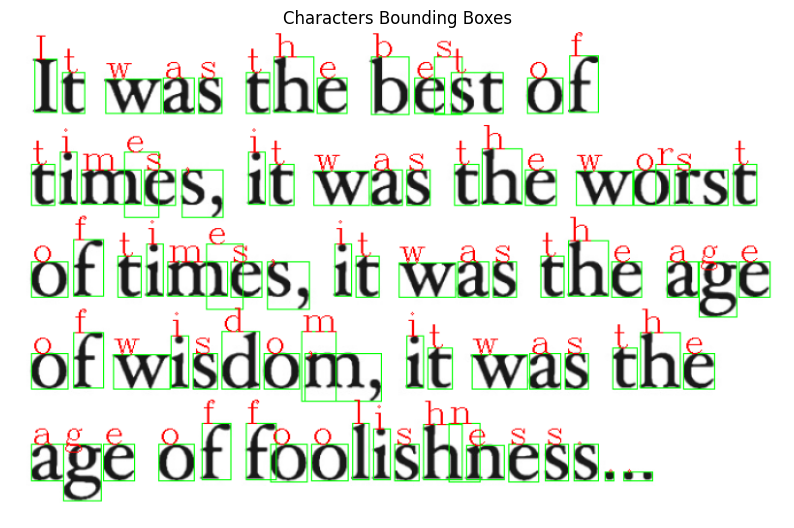

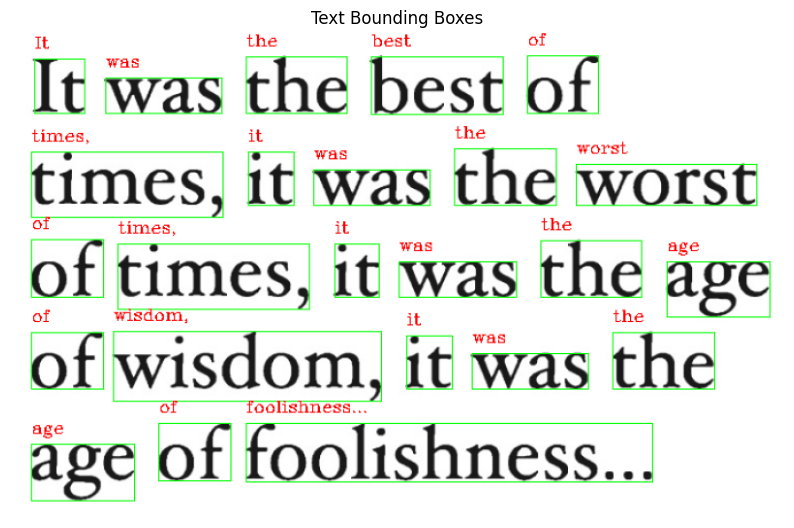

Detected Letters:
 Itwasthebestof
timesitwastheworst
oftimesitwastheage
ofwisdomitwasthe
ageoffoolishness

Detected Digits:
 0

Processed Text:
 It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness. . .



In [4]:
# Main execution
if __name__ == "__main__":
    # Prompt the user to specify the language
    languages = {
        "1": "eng",
        "2": "ben",
        "3": "kan",
        "4": "hin"
    }
    print("Select the language of the image:")
    print("1: English")
    print("2: Bengali")
    print("3: Kannada")
    print("4: Hindi")
    choice = input("Enter the number corresponding to the language: ")
    selected_language = languages.get(choice, "eng")

    # Prompt the user to specify the image file name
    image_file_name = input("Enter the image file name (e.g., images\\image.png): ")

    # Load and preprocess the image
    img, binary_img = preprocess_image(image_file_name)

    # Resize images for display
    img_resized = resize_image(img, width=800)
    binary_img_resized = resize_image(binary_img, width=800)

    # Show the output using matplotlib
    show_image_with_matplotlib(img_resized, "Original Image")
    show_image_with_matplotlib(binary_img_resized, "Preprocessed Image")

    # Detect texts from the binary image
    texts = pytesseract.image_to_string(binary_img, lang=selected_language)
    print("Detected Texts:\n", texts)

    if selected_language == "eng":
        # Detect characters and their bounding boxes
        boxes = pytesseract.image_to_boxes(binary_img, lang=selected_language)
        print("Character Bounding Boxes:\n", boxes)

        img_with_char_boxes = draw_boxes_on_characters(img.copy(), boxes)

        # Resize image for display
        img_with_char_boxes_resized = resize_image(img_with_char_boxes, width=800)

        show_image_with_matplotlib(img_with_char_boxes_resized, "Characters Bounding Boxes")

        raw_data = pytesseract.image_to_data(binary_img, lang=selected_language)
        img_with_text_boxes = draw_boxes_on_text(img.copy(), raw_data)

        # Resize image for display
        img_with_text_boxes_resized = resize_image(img_with_text_boxes, width=800)

        show_image_with_matplotlib(img_with_text_boxes_resized, "Text Bounding Boxes")

        # Save the image with bounding boxes
        cv2.imwrite("output_with_char_boxes.png", img_with_char_boxes)
        cv2.imwrite("output_with_text_boxes.png", img_with_text_boxes)

    # Set Tesseract configuration to recognize only letters
    config_letters = r'-c tessedit_char_whitelist=' + string.ascii_letters
    text_letters = pytesseract.image_to_string(binary_img, config=config_letters, lang=selected_language)
    print("Detected Letters:\n", text_letters)

    # Set Tesseract configuration to recognize only digits
    config_digits = r'-c tessedit_char_whitelist=' + string.digits
    text_digits = pytesseract.image_to_string(binary_img, config=config_digits, lang=selected_language)
    print("Detected Digits:\n", text_digits)

    # Example usage with detected text
    processed_text = post_process_text(texts)
    print("Processed Text:\n", processed_text)